In [2]:
import numpy as np
#import mlflow
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
from PIL import Image
from dataset import *
from save_load import *
from RecUnet_entangled import *
from train_RecUnet import *
%load_ext autoreload
%autoreload 2

#mlflow.autolog()

c:\Users\gaynuliy\Anaconda3\envs\home\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Using device: cuda


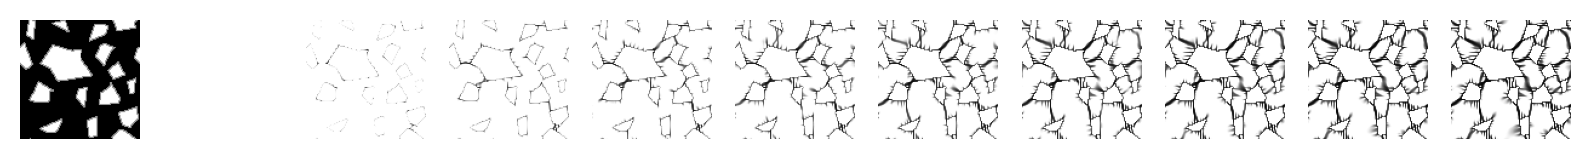

In [3]:
data = dataset_seq()
geometry, damage, imp_shrinkage, obs_shrinkage = data.__getitem__(1000)
loaders = get_loaders(data, 4)
fig, axs = plt.subplots(nrows=1, ncols=11, figsize=(10, 1), dpi=200)
axs.flat[0].imshow(geometry[0], cmap='Greys')
axs.flat[0].set_axis_off()
for i in range(1,11):
    axs.flat[i].imshow(damage[i], cmap='Greys')
    axs.flat[i].set_axis_off()

In [4]:
args = {'lr' : 0.0001, 'epochs' : 10, 'dev' : dev, 'name' : 'RecUnet_ent'}

In [5]:
unet = RecUNet()

In [7]:
unet = load_network(unet, args['name']+'_4', args)

In [8]:
losses_train, losses_val = train(unet, loaders, args)

Epoch: 0 batch: 0 mean train loss:  20181.3211130669
Epoch: 0 batch: 100 mean train loss:  20816.2932288821
Epoch: 0 batch: 200 mean train loss:  17993.1082027099
Epoch: 0 batch: 300 mean train loss:  21280.3549301520
Epoch: 0 batch: 400 mean train loss:  18374.3844134296
Epoch: 0 batch: 500 mean train loss:  21393.6612390894
Epoch: 0 batch: 600 mean train loss:  21263.9491789341
Epoch: 0 batch: 700 mean train loss:  17789.3037114143
Epoch: 0 batch: 800 mean train loss:  20543.4220926293
Epoch: 0 batch: 900 mean train loss:  19222.2818606413
Epoch: 0 batch: 1000 mean train loss:  18318.4869799992
Epoch: 0 batch: 1100 mean train loss:  16707.8116264629
Epoch: 0 batch: 1200 mean train loss:  19868.8549017095
Epoch: 0 batch: 1300 mean train loss:  16727.8304631820
Epoch: 0 batch: 1400 mean train loss:  19478.9711115863
Epoch: 0 batch: 1500 mean train loss:  18892.9898084151
Epoch: 0 batch: 1600 mean train loss:  20442.7148511846
Epoch: 0 batch: 1700 mean train loss:  20465.5385596921
Epoc

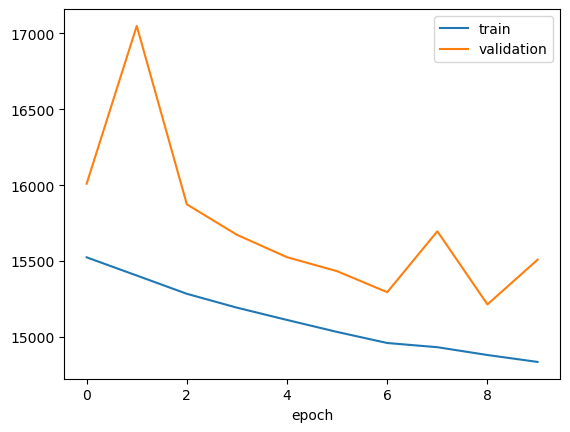

In [8]:
plt.plot(losses_train)
plt.plot(losses_val)
plt.xlabel('epoch')
plt.legend(['train', 'validation'])